In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from glob import glob

In [4]:
lc_paths = sorted(glob('data/sp1428_lc/*/Photometric/*.fits'))
median_paths = sorted(glob('data/sp1428_lc/*/Median/*.fits'))

In [74]:
from astropy.coordinates import SkyCoord
import astropy.units as u

# http://simbad.harvard.edu/simbad/sim-id?Ident=%405114371&Name=SDSS%20J142751.53%2b331010.0&submit=submit
target_coord = SkyCoord(ra='14h27m51.5195994975s', dec='+33d10m10.048351868s')

cadence: 0.7332482188940048 [min]


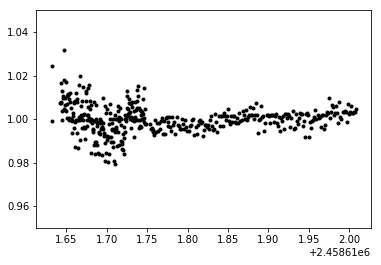

cadence: 1.6833604127168655 [min]


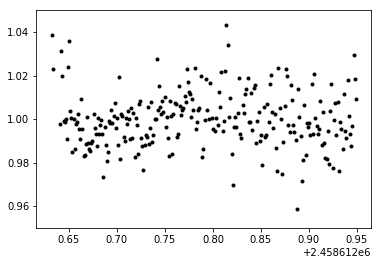

cadence: 1.6666562855243683 [min]


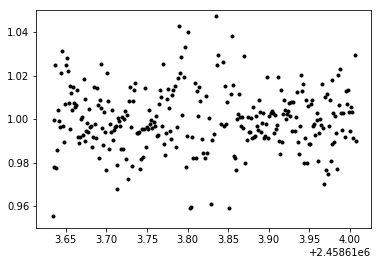

cadence: 4.283279925584793 [min]


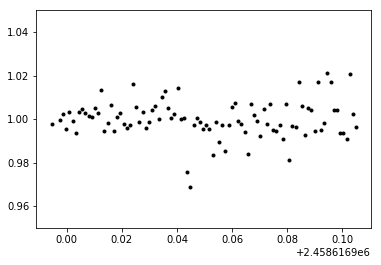

cadence: 1.6666562855243683 [min]


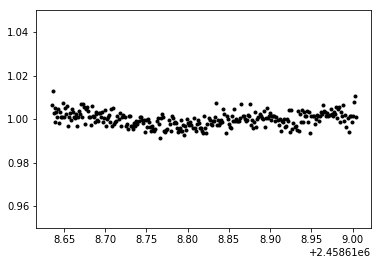

cadence: 1.6833597421646118 [min]


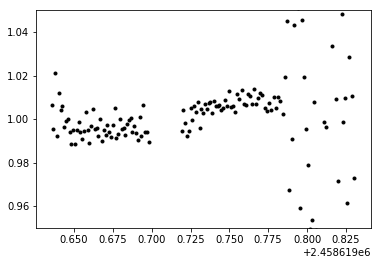

cadence: 9.382896199822426 [min]


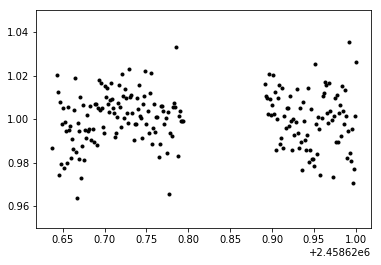

cadence: 1.683216243982315 [min]


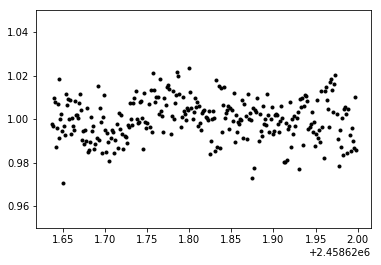

cadence: 1.683216243982315 [min]


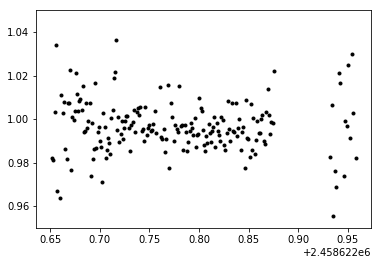

cadence: 1.7665920406579971 [min]


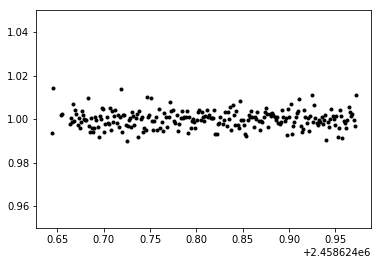

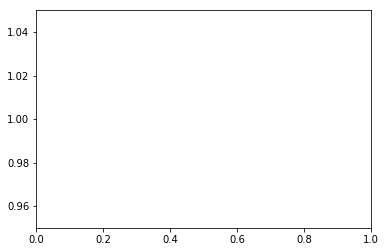

cadence: 1.683216243982315 [min]


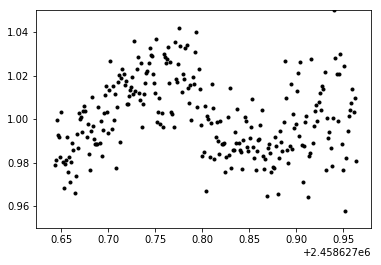

cadence: 12.982751950621605 [min]


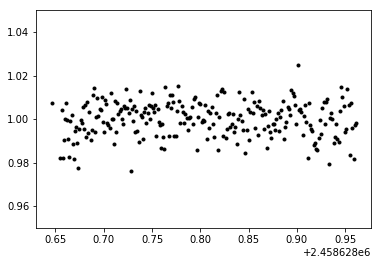

cadence: 4.833215922117233 [min]


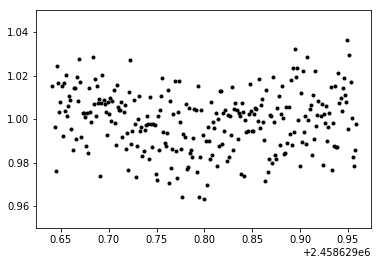

cadence: 1.6832155734300613 [min]


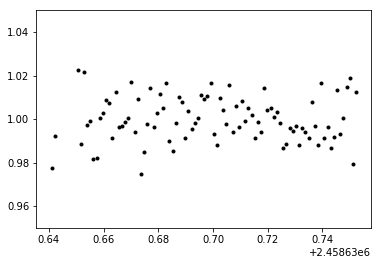

cadence: 1.6999197006225586 [min]


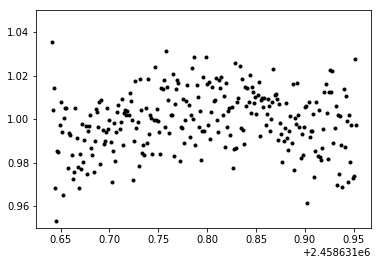

cadence: 1.6999197006225586 [min]


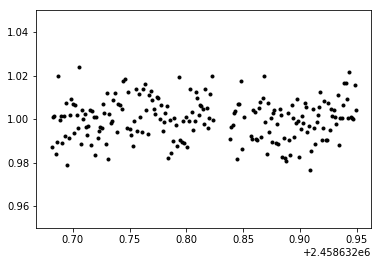

cadence: 1.683216243982315 [min]


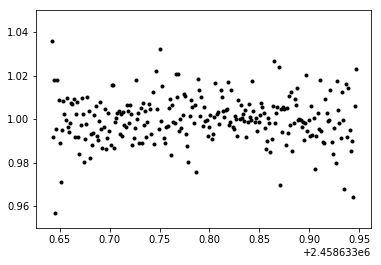

cadence: 1.6666556149721146 [min]


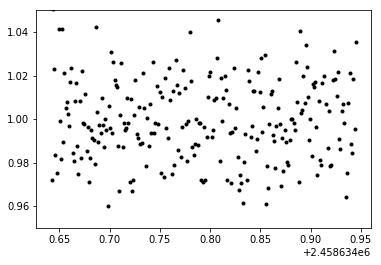

cadence: 1.683216243982315 [min]


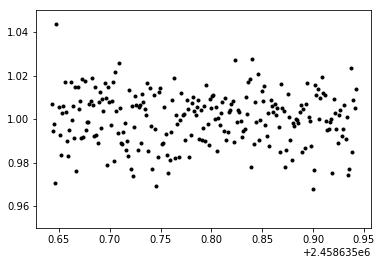

cadence: 1.6666562855243683 [min]


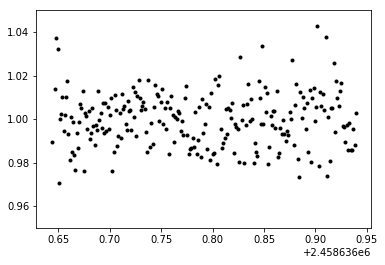

cadence: 1.6665121167898178 [min]


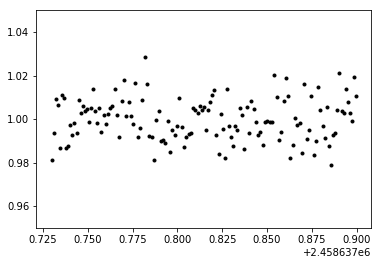

cadence: 1.6999203711748123 [min]


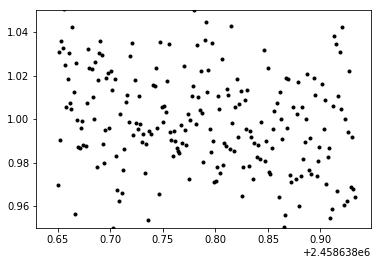

cadence: 1.6498079895973206 [min]


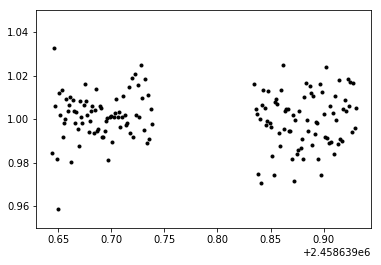

cadence: 1.6665121167898178 [min]


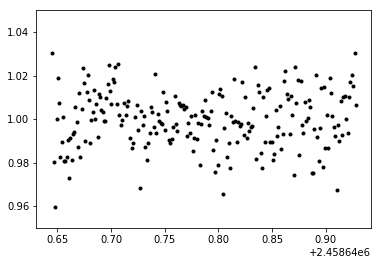

cadence: 1.6498079895973206 [min]


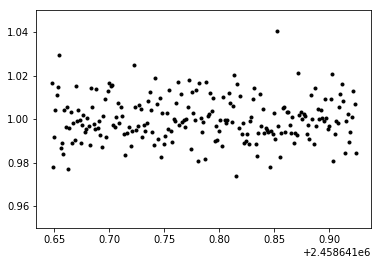

cadence: 1.683216243982315 [min]


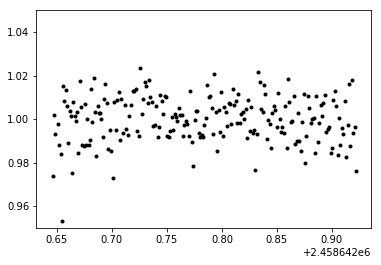

cadence: 1.6833604127168655 [min]


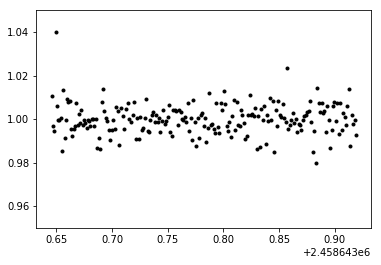

cadence: 1.6666562855243683 [min]


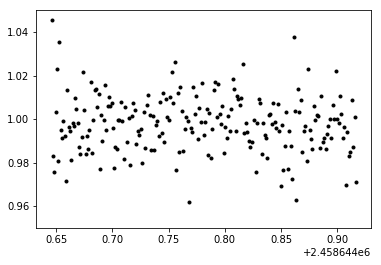

cadence: 1.6832155734300613 [min]


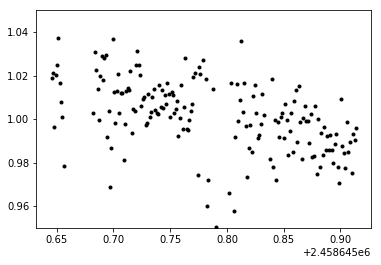

In [104]:
star_index = 0
import os
for lc_path, median_path in zip(lc_paths, median_paths):
    hdu_median = fits.open(median_path)
    hdu_lc = fits.open(lc_path)
    times = hdu_lc[1].data['julian_date']
    
    # Match the target star index based on coordinates: 
    ra, dec = hdu_lc[4].data[6:8, :, :].mean(axis=2)
    coords = SkyCoord(ra=ra*u.deg, dec=dec*u.deg)
    target_index = coords.separation(target_coord).argmin()

    # Get the target star's flux: 
    flux = hdu_lc[13].data.T[:, target_index]
    
    if len(times) > 1: 
        polynomial_fit = np.polyval(np.polyfit(times-times.mean(), flux, 1), times-times.mean())
        plt.plot(times, flux/polynomial_fit, 'k.')
        print('cadence: {} [min]'.format(24*60*(times[1] - times[0])))
        np.save('data/npy/{0}.npy'.format(median_path.split('/')[2]), np.vstack([times, flux/polynomial_fit]).T)
    plt.ylim([0.95, 1.05])
    plt.show()